In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from stattests.tests import *
from stattests.generation import generate_data
from stattests.utils import plot_cdf, plot_summary, apply_all_tests, codenames2titles, rpv, frame_from_params, plot_from_params
import seaborn as sns
sns.set_style("whitegrid")
from tqdm import tqdm

import sys
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [3]:
list(getattr(tqdm, '_instances'))
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

AttributeError: type object 'tqdm' has no attribute '_instances'

In [3]:
codenames2titles.keys()

dict_keys(['ttest_successes_count', 'mannwhitney_successes_count', 'delta', 'bootstrap', 'linearization', 'buckets', 't_test_ctrs', 'weighted_bootstrap', 'weighted_linearization', 'weighted_buckets', 'weighted_t_test_ctrs', 'weighted_sqr_bootstrap', 'weighted_sqr_linearization', 'weighted_sqr_buckets', 'weighted_sqr_t_test_ctrs', 'ttest_smoothed'])

# Powers

In [2]:
success_rate = 0.02
uplift = 0.2
beta = 1000
N = 5000
NN = 2000
skews = np.linspace(0.1, 4, 20)

params = []
for skew in skews:
    params.append({'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN})

Сгенерируем данные для гифки, работает оч долго. Для дефолтных парметров можно скипнуть, она уже отрабатывала

In [41]:
for param in tqdm(params):
    apply_all_tests('../data', **param)


100%|██████████| 20/20 [17:03<00:00, 53.26s/it]

Доступные кодовые имена

Text(0,0.5,'Sensitivity')

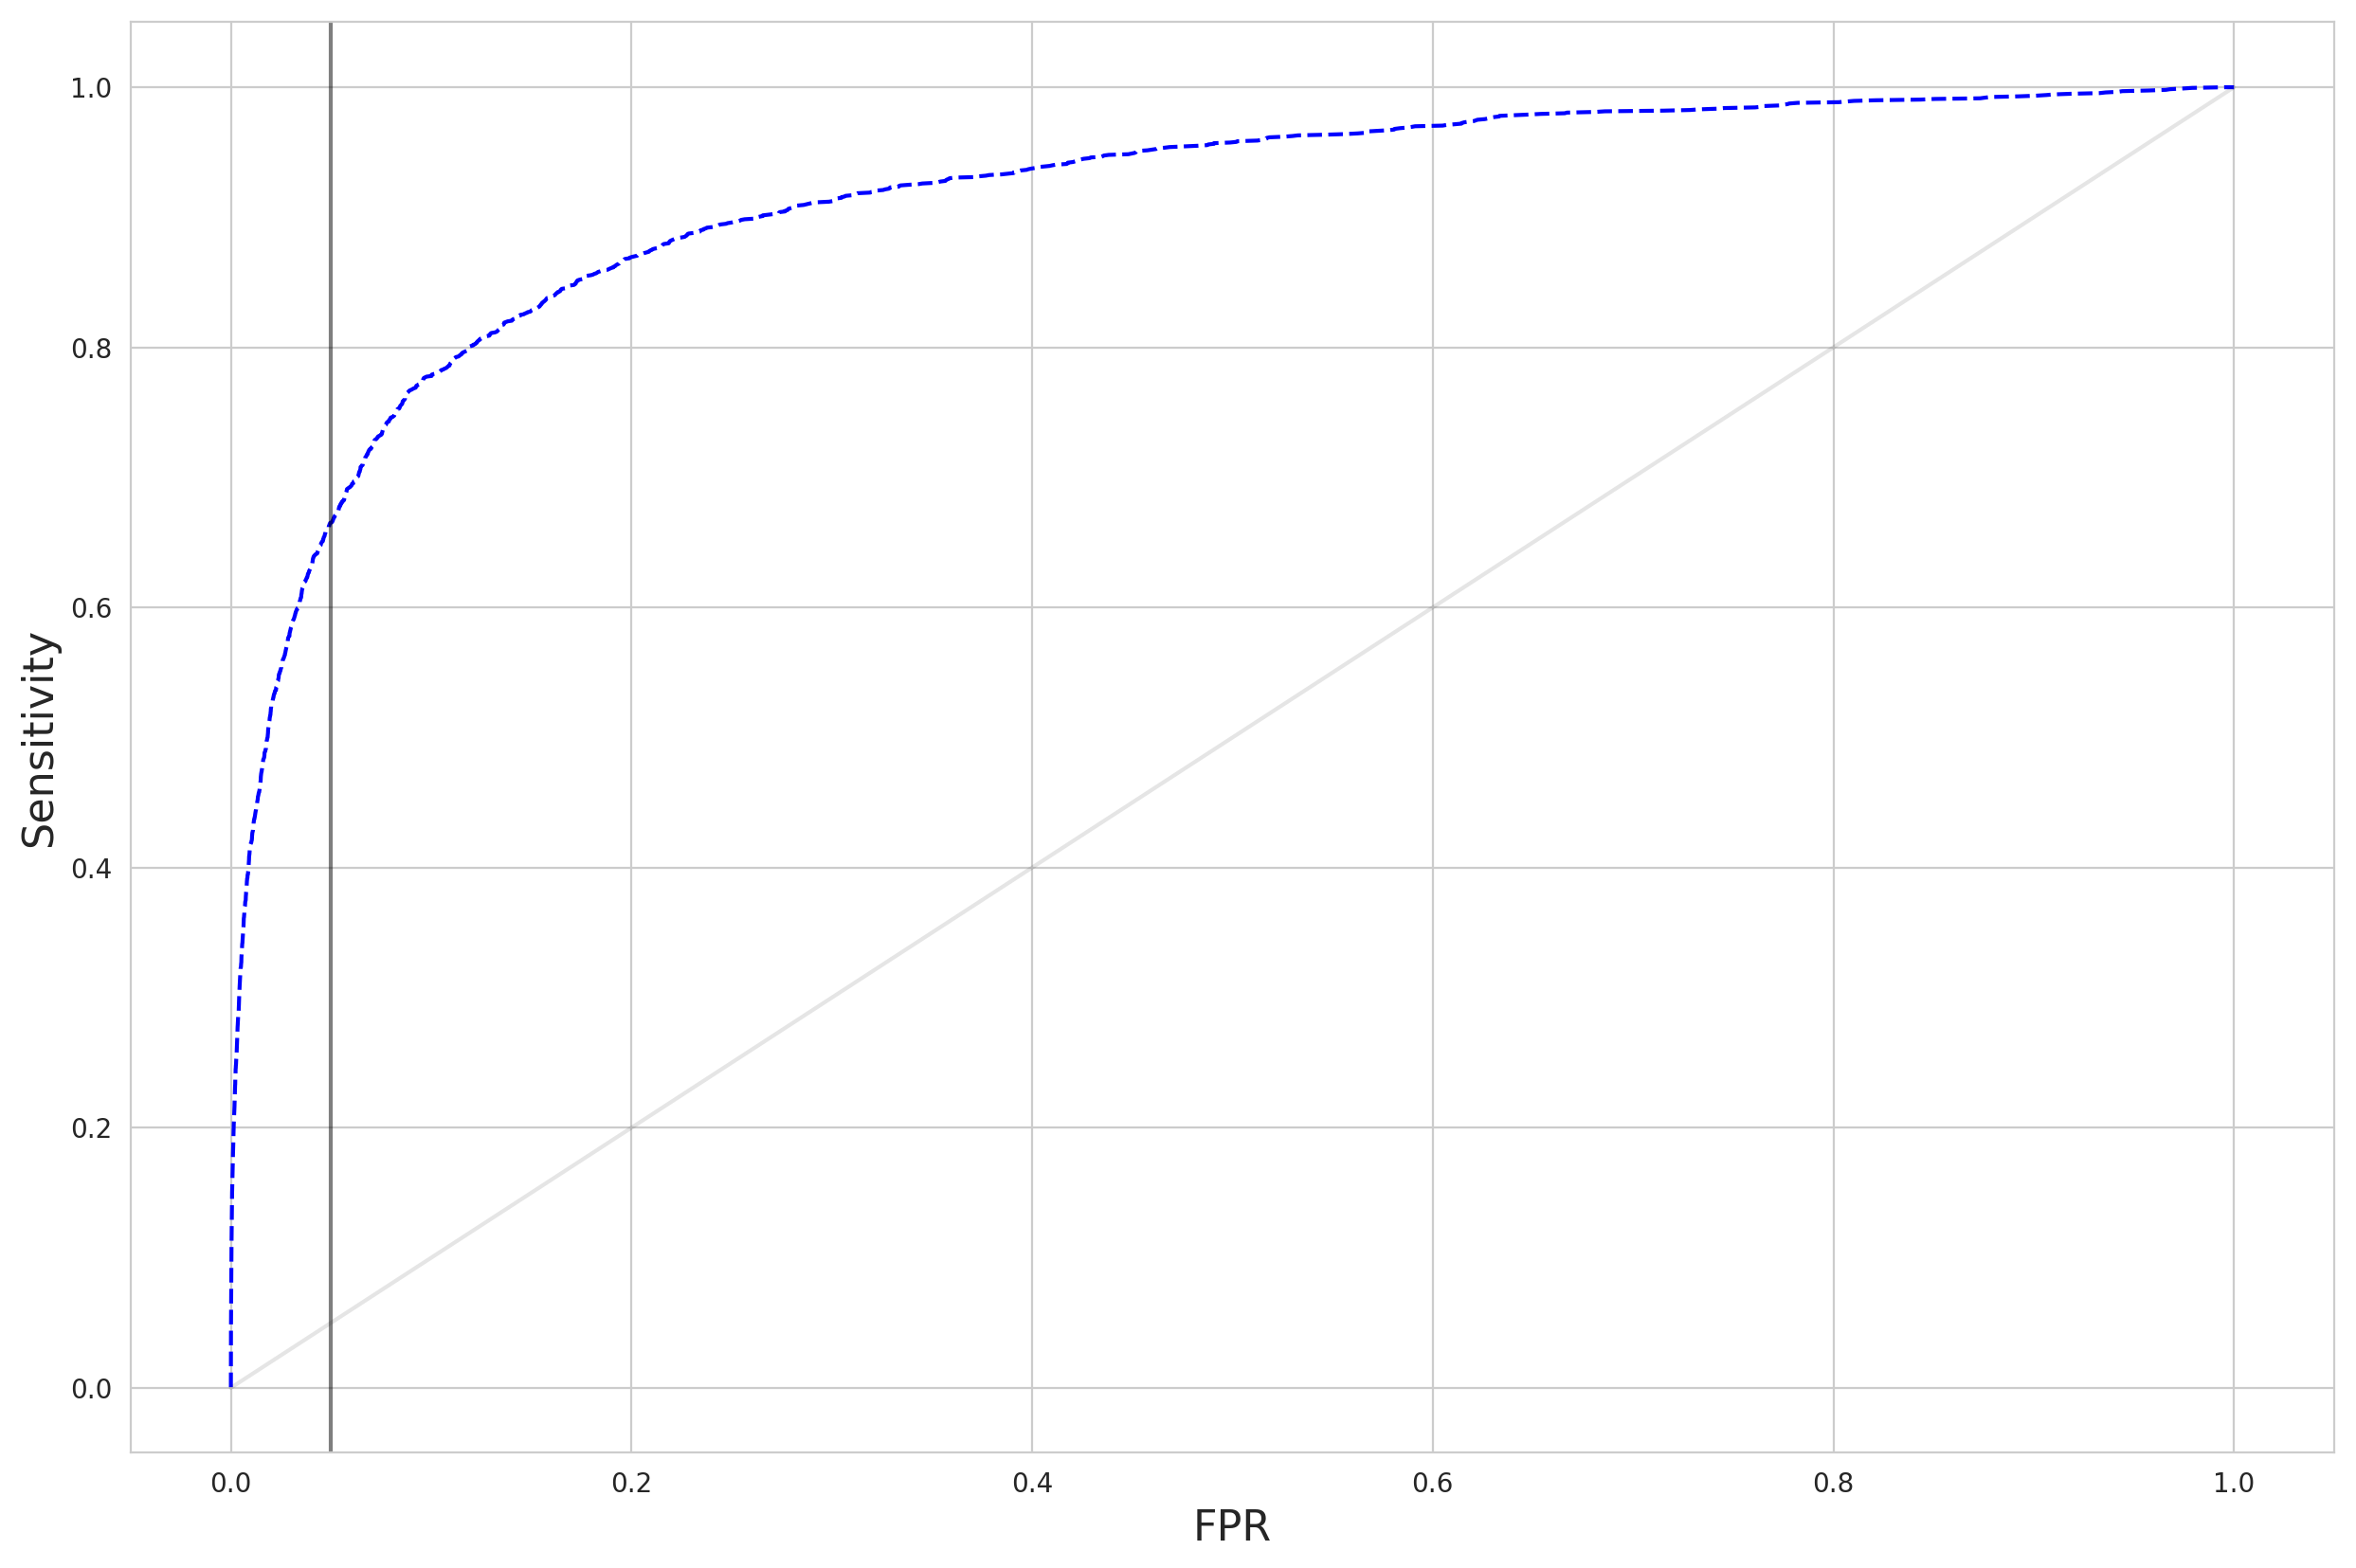

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=200)
ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift,
                      beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(ab_data, 'MW', ax, 'b--')
ax.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel('FPR', fontdict={'size': 16})
ax.set_ylabel('Sensitivity', fontdict={'size': 16})

Text(0.5,0,'P-value threshold')

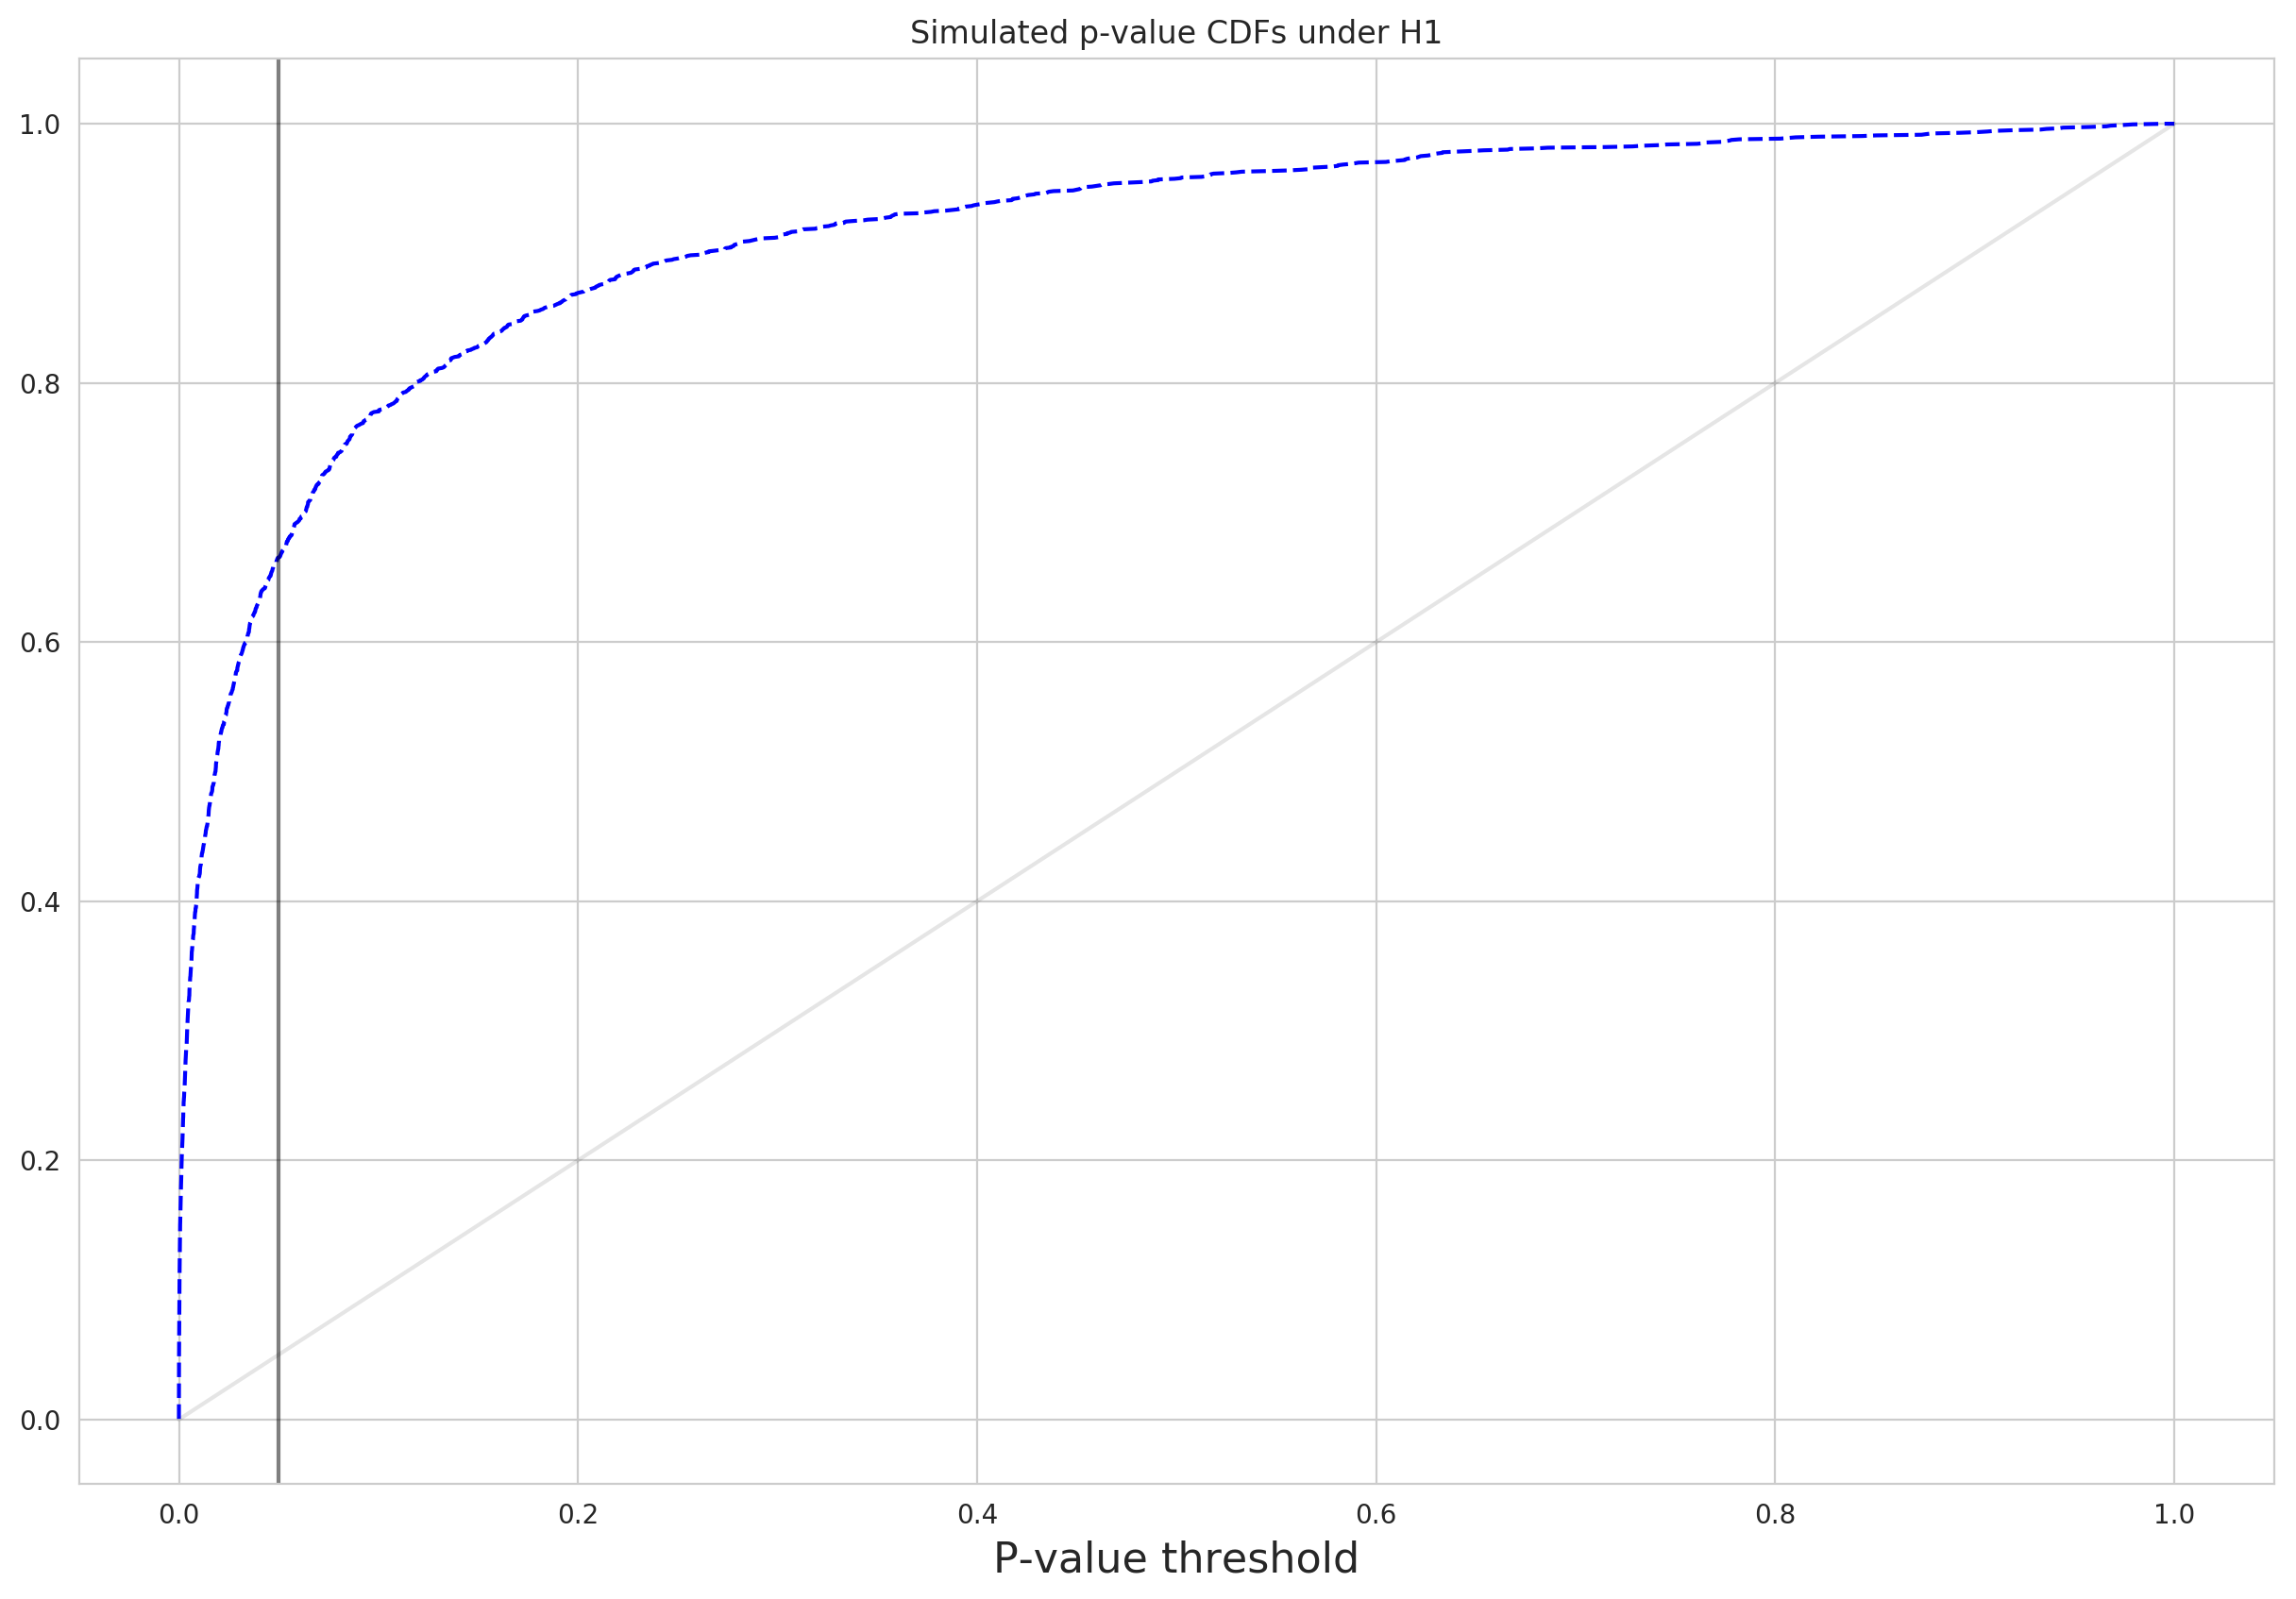

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=200)
ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift,
                      beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(ab_data, 'MW', ax, 'b--')
ax.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_title('Simulated p-value CDFs under H1')
ax.set_xlabel('P-value threshold', fontdict={'size': 16})

Text(0.5,0,'P-value threshold')

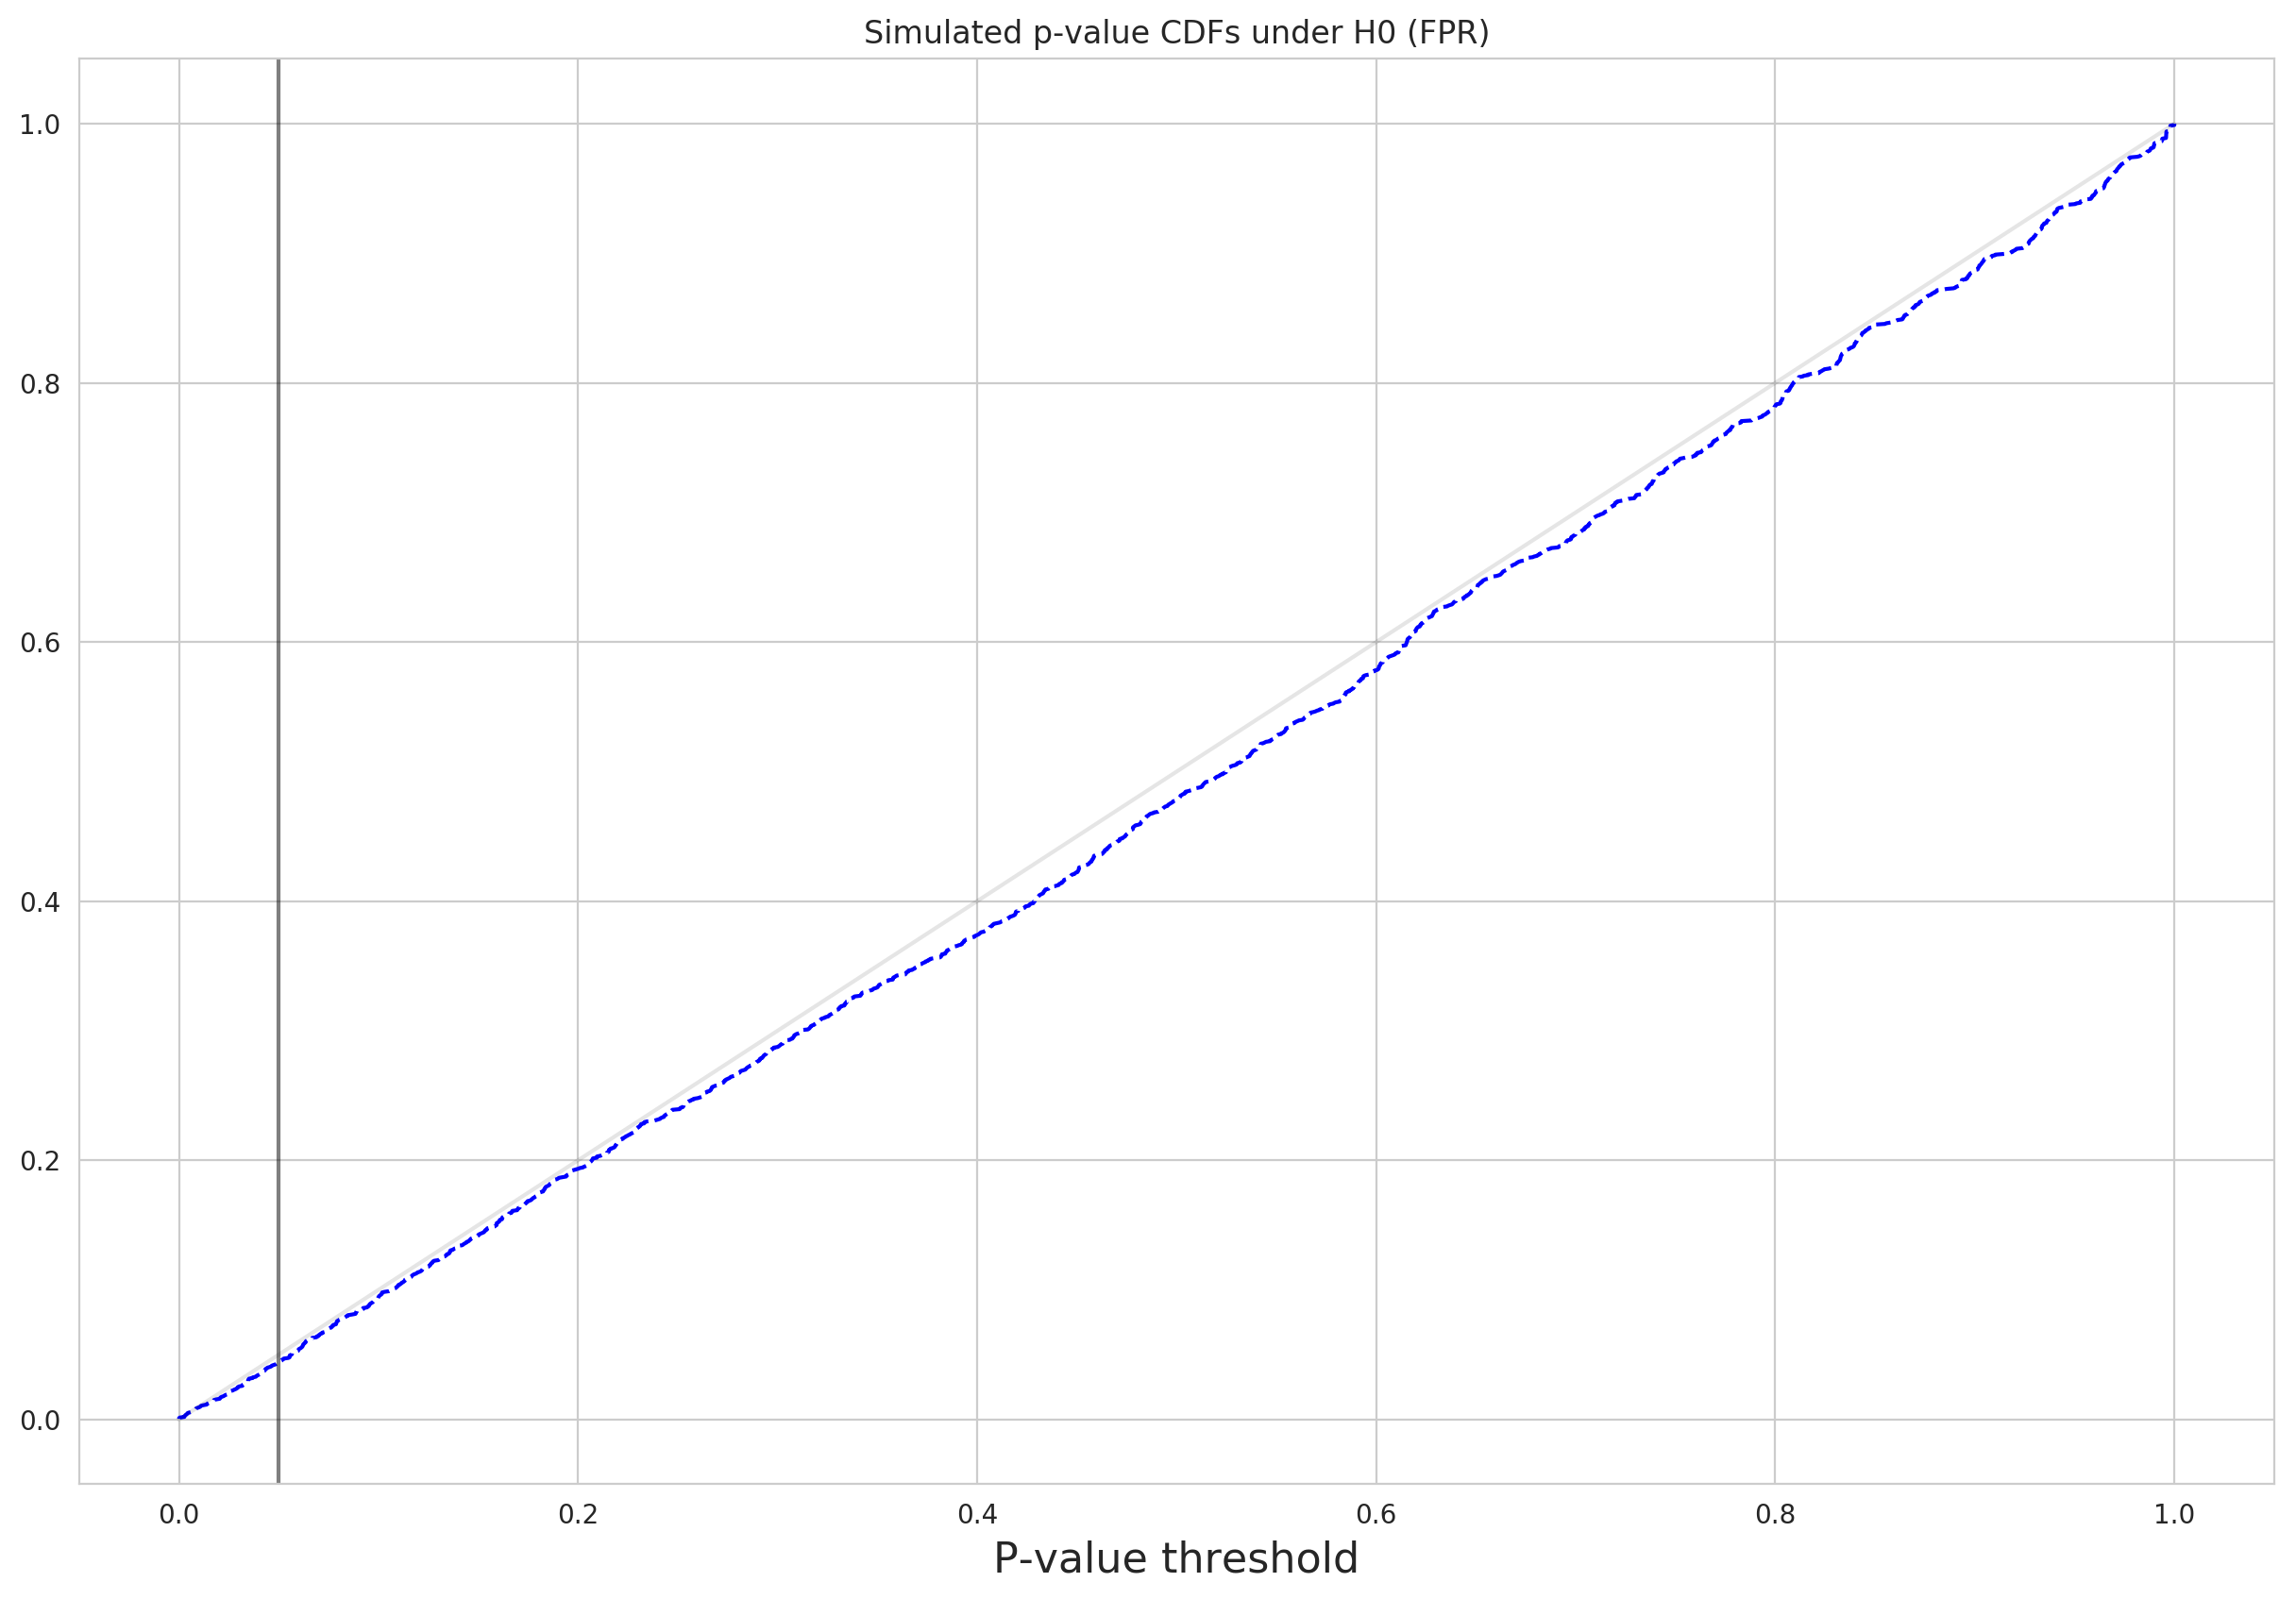

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), dpi=200)
ab_data, aa_data = rpv('../data', 'mannwhitney_successes_count', N=N, NN=NN, uplift=uplift,
                      beta=beta, success_rate=success_rate, skew=0.1)
plot_cdf(aa_data, 'MW', ax, 'b--')
ax.plot(np.linspace(0, 1, 10000), np.linspace(0, 1, 10000), 'k', alpha=0.1)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_title('Simulated p-value CDFs under H0 (FPR)')
ax.set_xlabel('P-value threshold', fontdict={'size': 16})

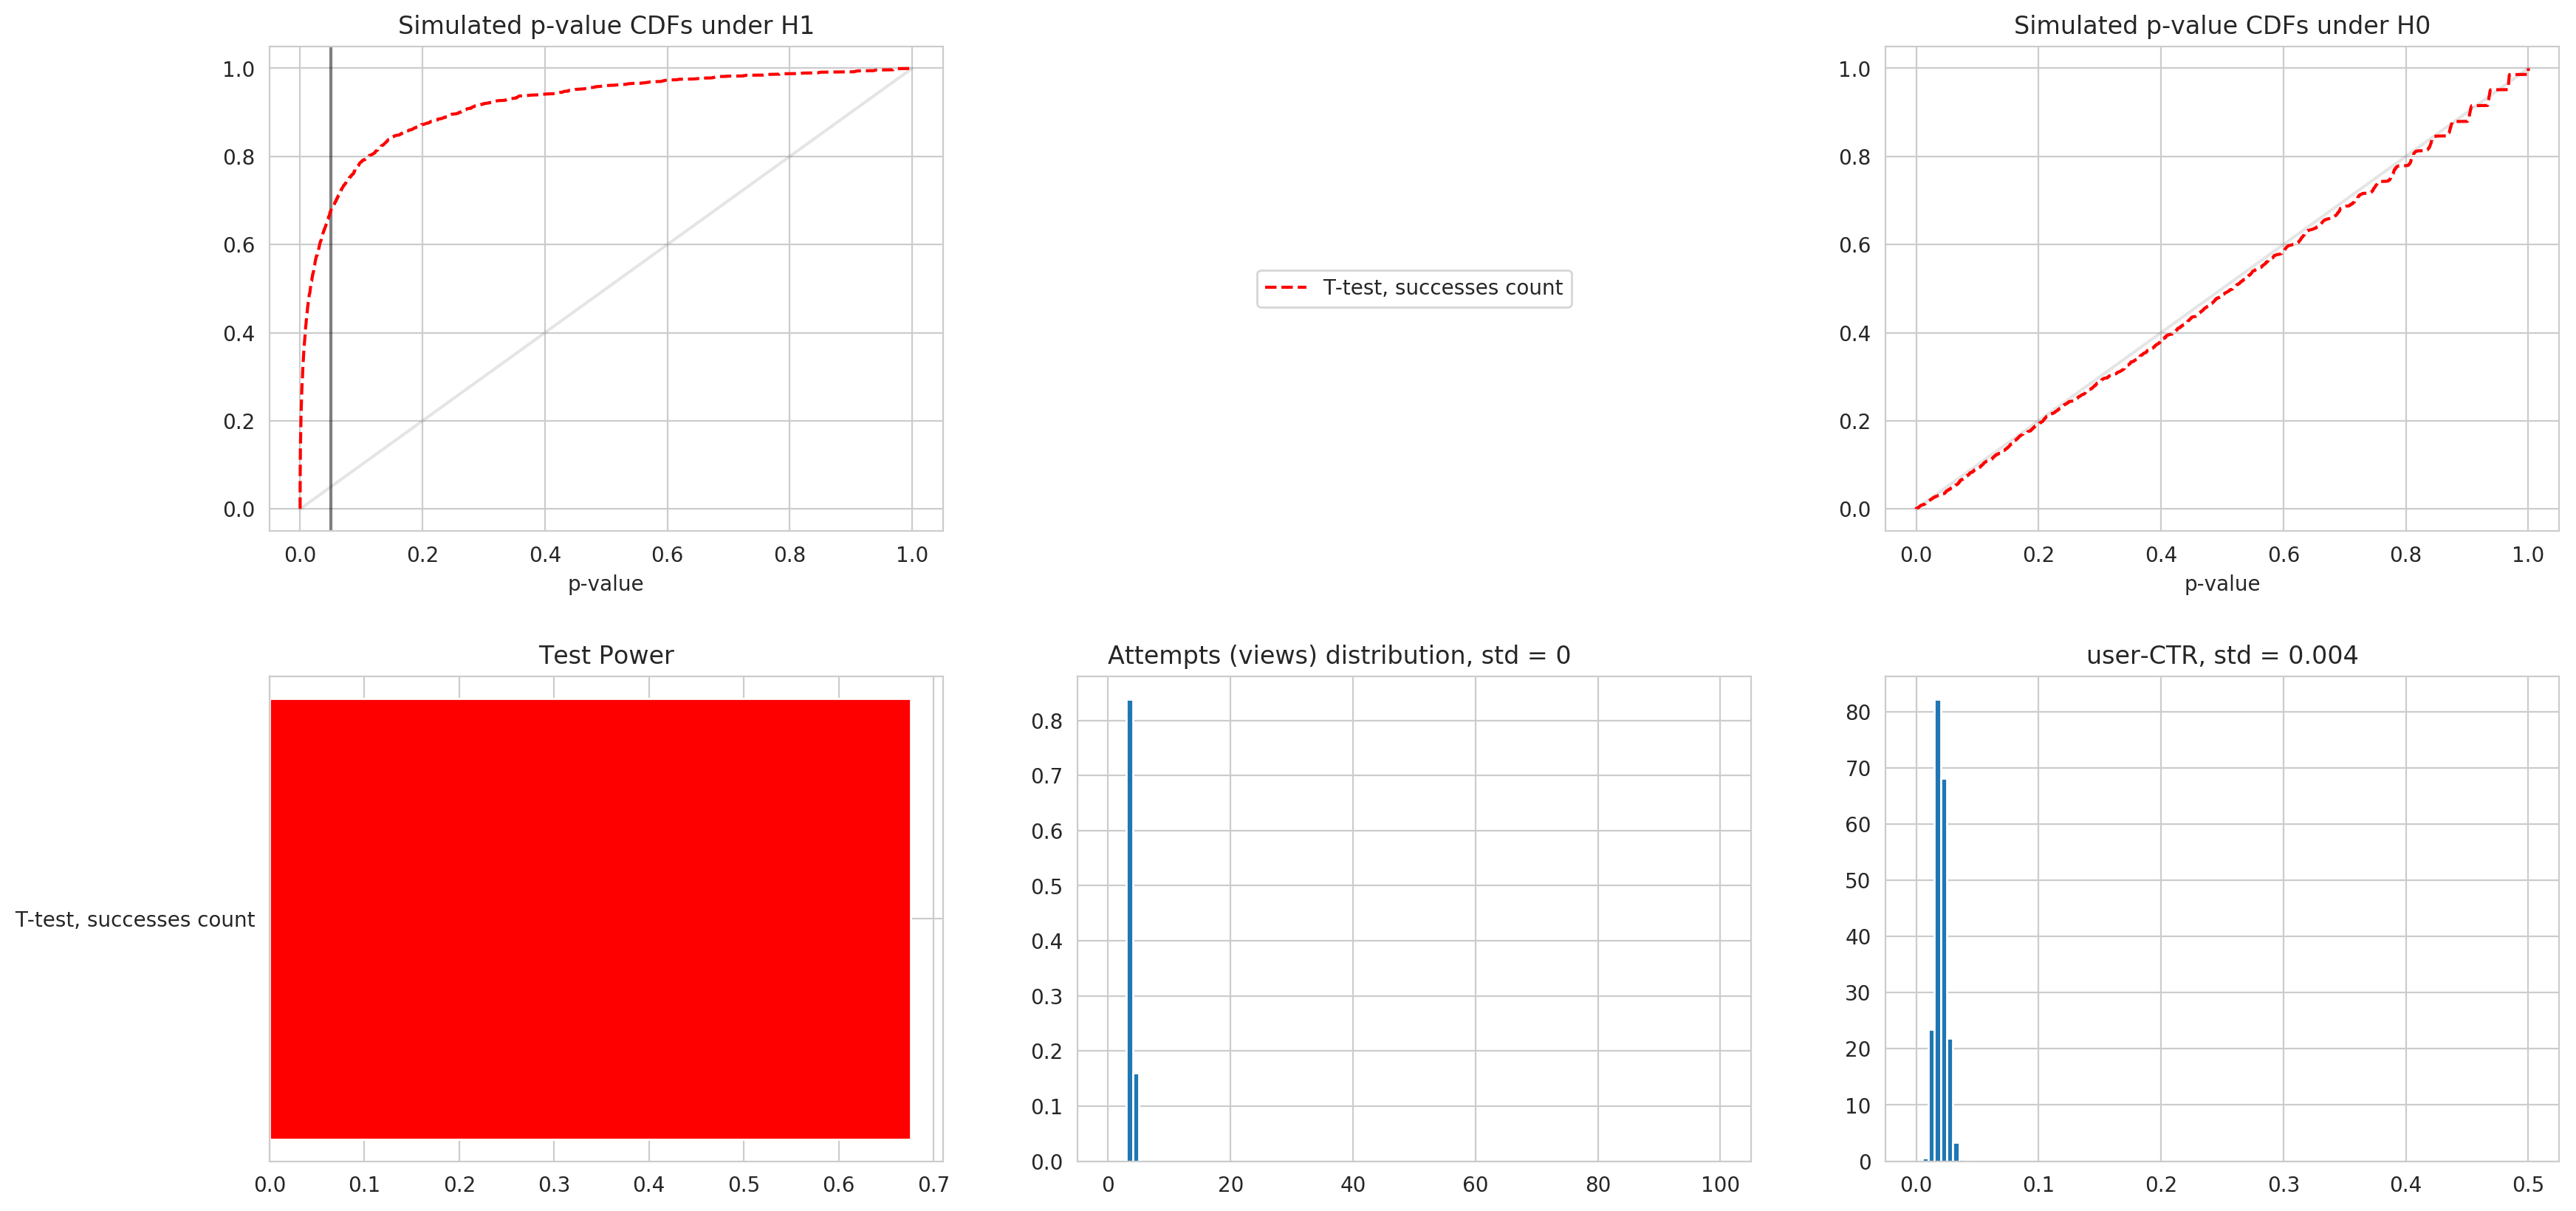

In [42]:
fig = plot_from_params('../data', params[0], codenames=['ttest_successes_count'])
#,'mannwhitney_successes_count'])

In [43]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count']) for p in params]
imageio.mimsave('../gifs/powers_ttest.gif', frames, fps=2, format='GIF-PIL')

In [44]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count',
                                                    'mannwhitney_successes_count']) for p in params]
imageio.mimsave('../gifs/ttest_mw_powers.gif', frames, fps=2, format='GIF-PIL')

In [ ]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count',
                                                    'mannwhitney_successes_count']) for p in params]
imageio.mimsave('../gifs/ttest_mw_powers.gif', frames, fps=2, format='GIF-PIL')

In [59]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_powers.gif', frames, fps=2, format='GIF-PIL')

In [63]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'delta']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_delta_powers.gif', frames, fps=2, format='GIF-PIL')

In [106]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'buckets']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_buckets_powers.gif', frames, fps=2, format='GIF-PIL')

In [111]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'linearization']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_linearization_powers.gif', frames, fps=2, format='GIF-PIL')

In [128]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 't_test_ctrs']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_ttest_ctrs_powers.gif', frames, fps=2, format='GIF-PIL')

In [129]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'ttest_smoothed']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_ttest_smoothed_powers.gif', frames, fps=2, format='GIF-PIL')

In [144]:
frames = [frame_from_params('../data', p, codenames=['bootstrap', 'weighted_bootstrap',
                                                     'buckets', 'weighted_buckets',
                                                    'mannwhitney_successes_count',
                                                     'ttest_smoothed']) for p in params]
imageio.mimsave('../gifs/ebay_weights_powers.gif', frames, fps=2, format='GIF-PIL')

# CTRs

In [141]:
success_rate = 0.02
uplift = 0.2
betas = np.logspace(0, 3, 20)[::-1]
N = 5000
NN = 2000
skew = 1

params = []
for beta in betas:
    params.append({'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN})

In [48]:
for param in tqdm(params):
    apply_all_tests('../data', **param)


100%|██████████| 20/20 [18:23<00:00, 54.58s/it]

In [52]:
frames = [frame_from_params('../data', p, codenames=['ttest_successes_count',
                                                    'mannwhitney_successes_count']) for p in params]
imageio.mimsave('../gifs/ttest_mw_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [61]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [65]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'delta']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_delta_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [109]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'buckets']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_buckets_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [113]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'linearization']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_linearization_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [125]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 't_test_ctrs']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_ttest_ctrs_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [134]:
frames = [frame_from_params('../data', p, codenames=['mannwhitney_successes_count',
                                                    'bootstrap', 'ttest_smoothed']) for p in params]
imageio.mimsave('../gifs/mw_bootstrap_ttest_smoothed_ctrs.gif', frames, fps=2, format='GIF-PIL')

In [142]:
frames = [frame_from_params('../data', p, codenames=['bootstrap', 'weighted_bootstrap',
                                                     'buckets', 'weighted_buckets',
                                                     'mannwhitney_successes_count',
                                                     'ttest_smoothed']) for p in params]
imageio.mimsave('../gifs/ebay_weights_ctrs.gif', frames, fps=2, format='GIF-PIL')

# Success rate

In [115]:
success_rates = np.logspace(-3, -0.3, 20)
uplift = 0.2
beta = 500
N = 5000
NN = 2000
skew = 1

params = []
for sr in success_rates:
    params.append({'success_rate': sr, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN})

In [81]:
for param in tqdm(params):
    apply_all_tests('../data', **param)


100%|██████████| 20/20 [16:43<00:00, 51.87s/it]

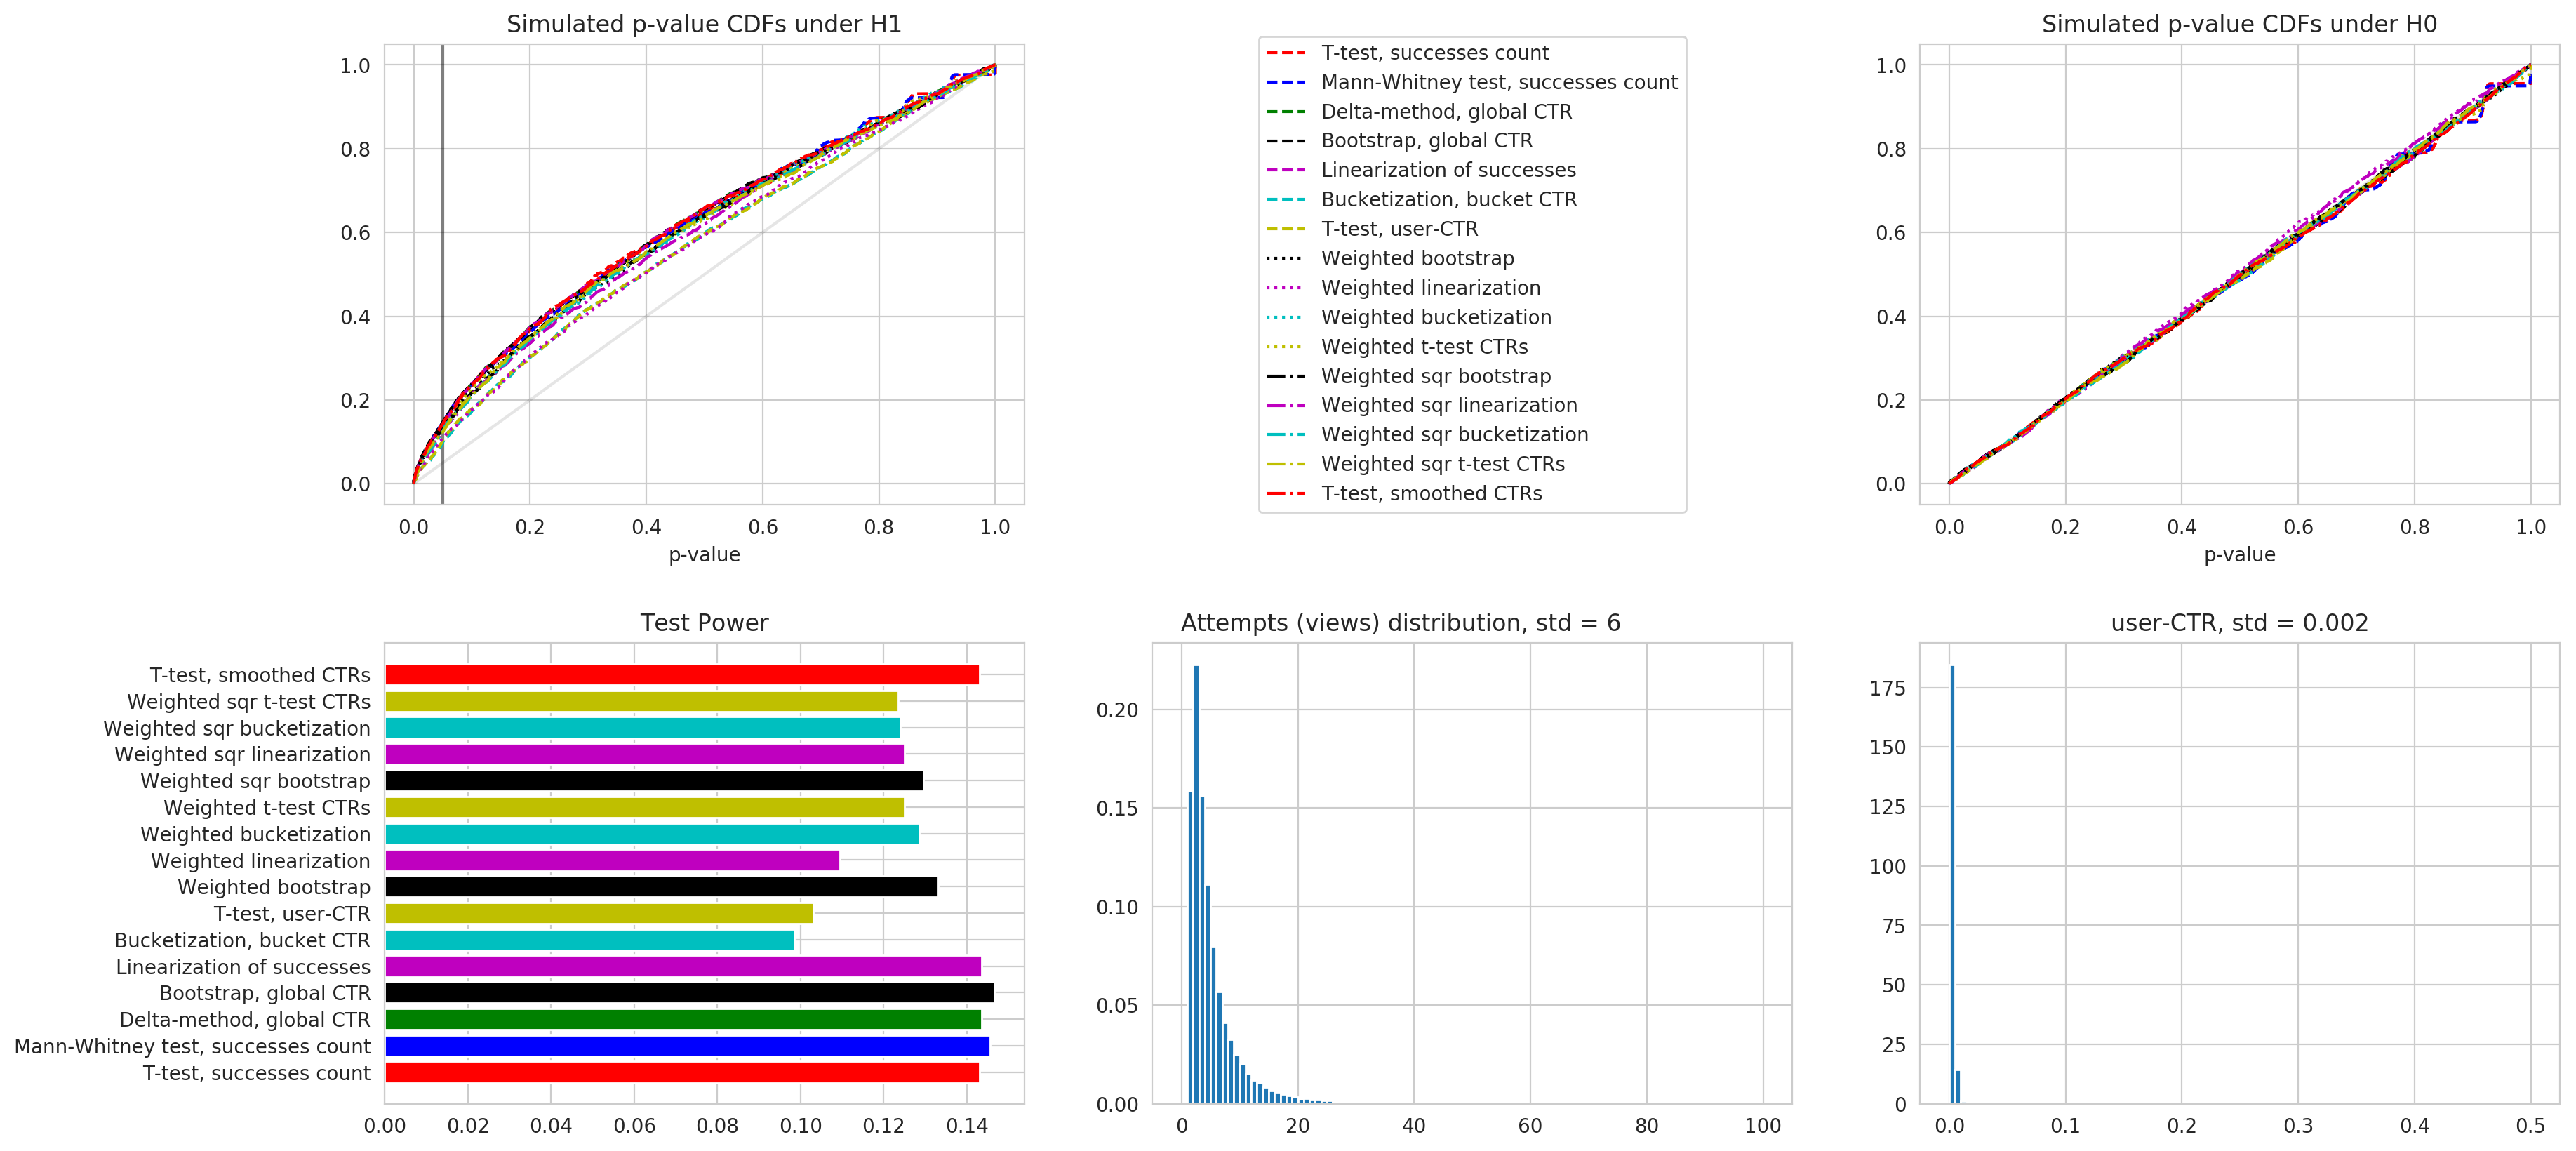

In [121]:
fig = plot_from_params('../data', params[2])

# Global CTR fuckup

Пример ручного запуска

In [49]:
success_rate = 0.02
uplift = 0.1 
beta = 10
N = 5000
NN = 2000
skew = 1

In [50]:
ab_params = {'success_rate': success_rate, 'uplift': uplift, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN}
aa_params = {'success_rate': success_rate, 'uplift': 0.0, 'beta': beta, 'skew': skew, 'N': N, 'NN': NN}

(attempts_0_ab, successes_0_ab), (attempts_1_ab, successes_1_ab), gt_success_rates = generate_data(**ab_params)
(attempts_0_aa, successes_0_aa), (attempts_1_aa, successes_1_aa), _ = generate_data(**aa_params)

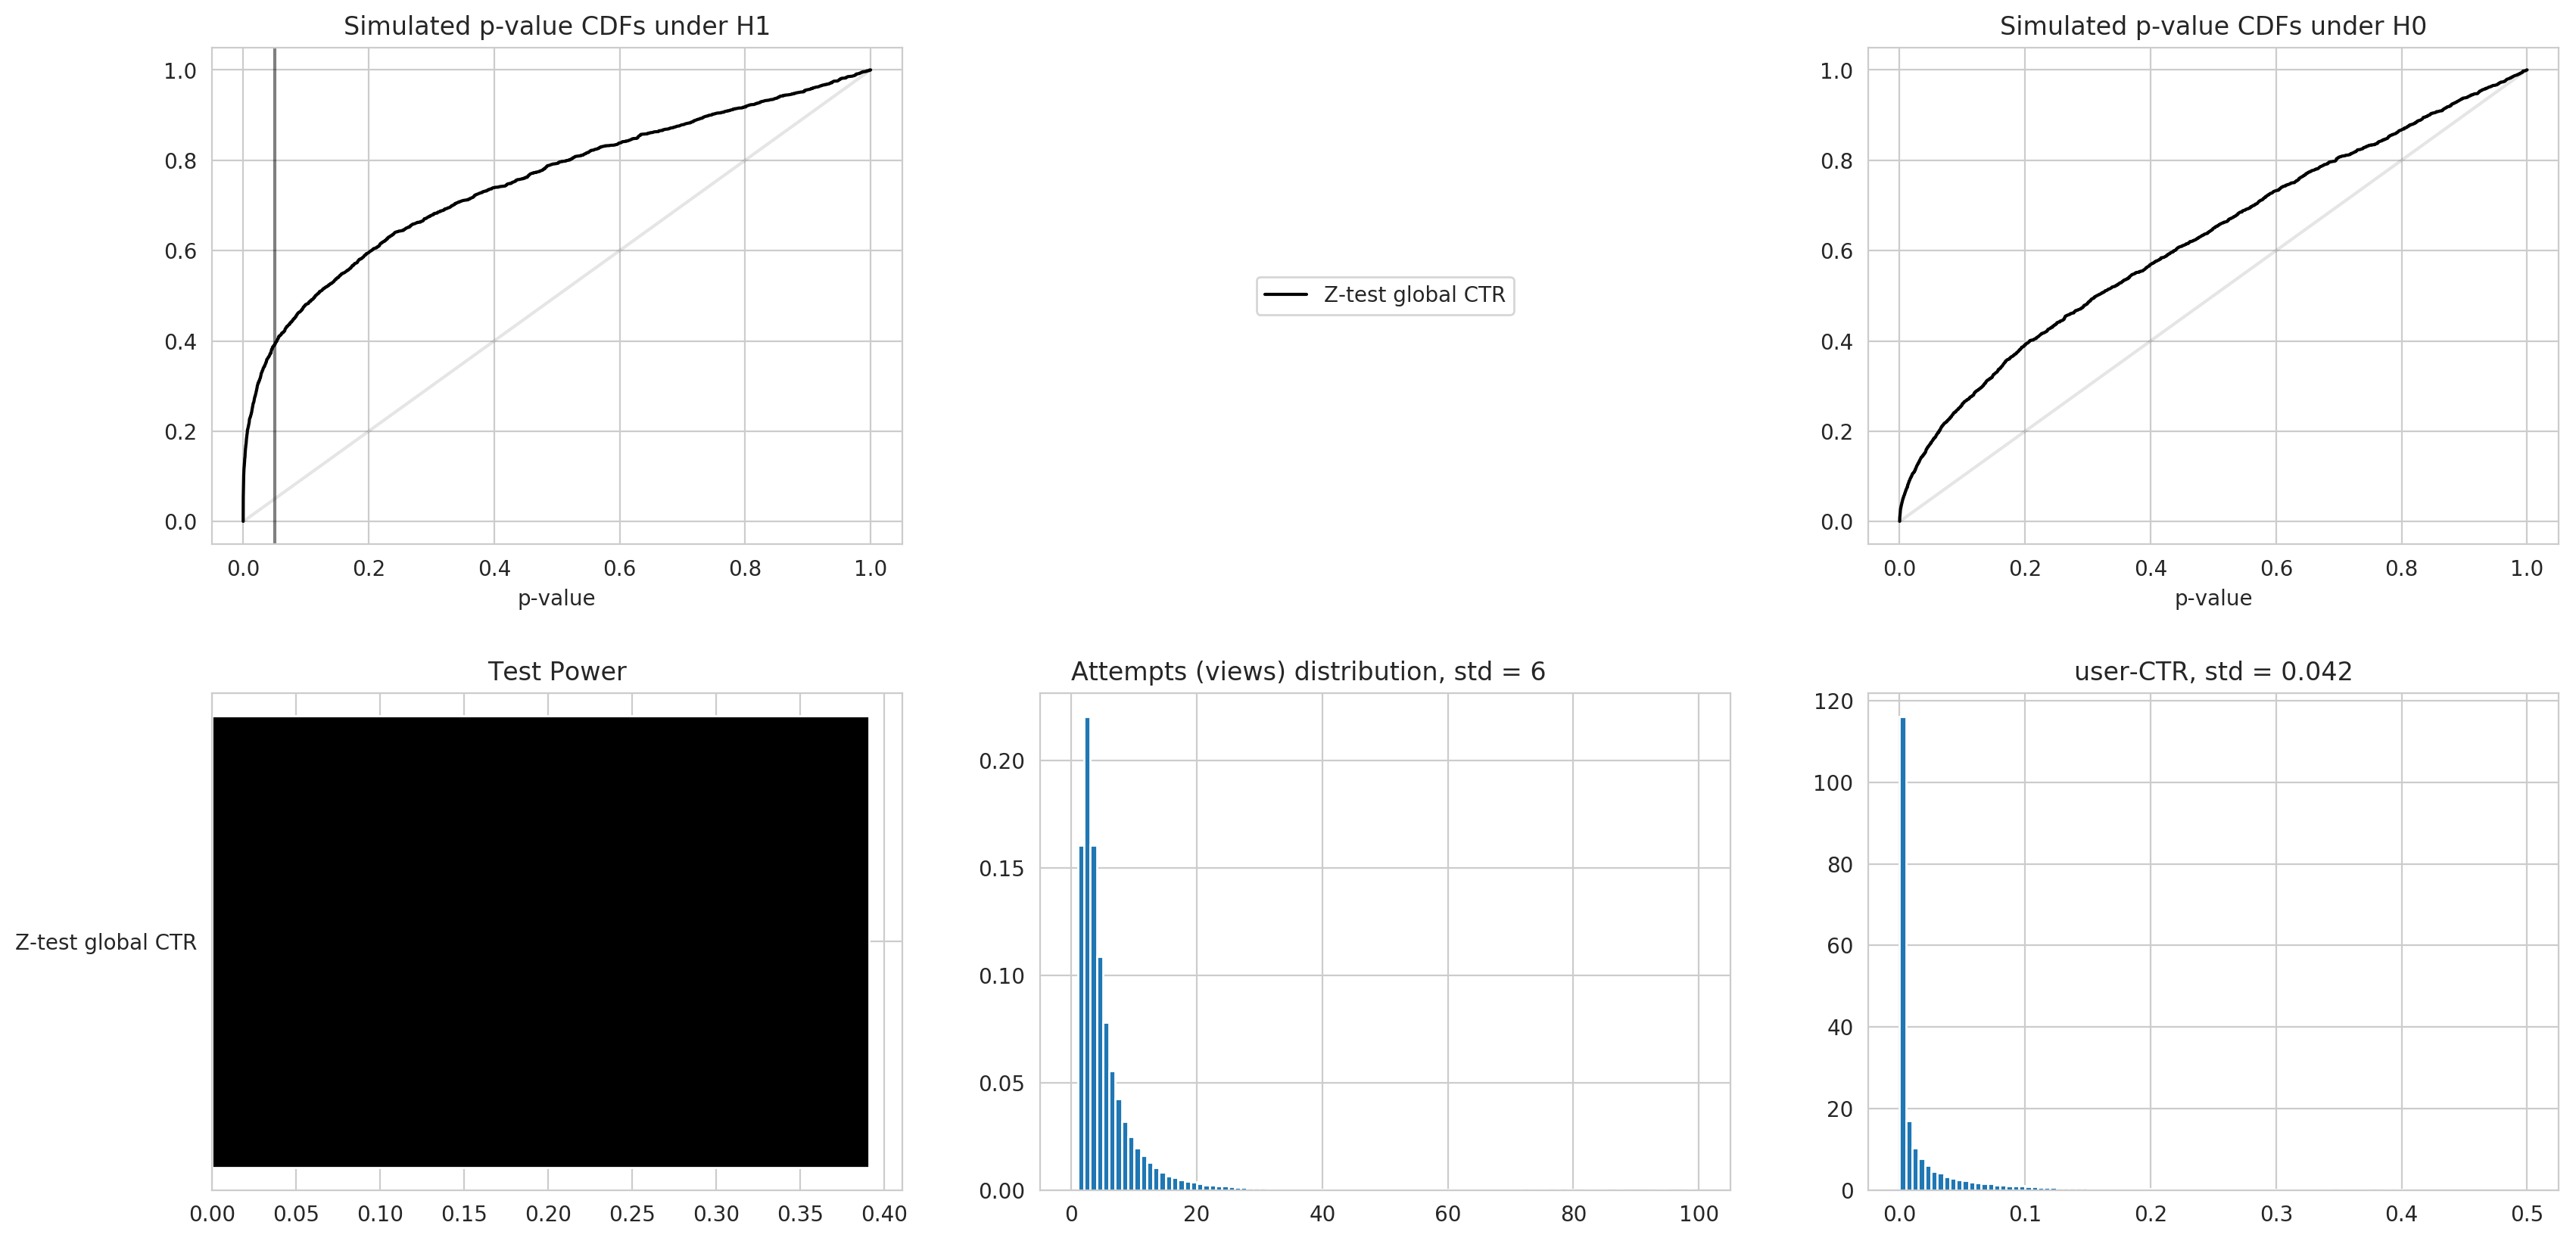

In [51]:
global_ctr_0_ab = successes_0_ab.sum(axis=1) / attempts_0_ab.sum(axis=1)
global_ctr_1_ab = successes_1_ab.sum(axis=1) / attempts_1_ab.sum(axis=1)
global_ctr_0_aa = successes_0_aa.sum(axis=1) / attempts_0_aa.sum(axis=1)
global_ctr_1_aa = successes_1_aa.sum(axis=1) / attempts_1_aa.sum(axis=1)

global_ctr_z_test_ab = proportions_diff_z_test(global_ctr_0_ab, attempts_0_ab.sum(axis=1), 
                                               global_ctr_1_ab, attempts_1_ab.sum(axis=1))
global_ctr_z_test_aa = proportions_diff_z_test(global_ctr_0_aa, attempts_0_aa.sum(axis=1), 
                                               global_ctr_1_aa, attempts_1_aa.sum(axis=1))

t_test_ab = t_test(successes_0_ab, successes_1_ab)
t_test_aa = t_test(successes_0_aa, successes_1_aa)

fig = plot_summary({
    'Z-test global CTR': (global_ctr_z_test_ab, global_ctr_z_test_aa, 'k-')
# ,
#     'Мой супер-тест': (t_test_ab, t_test_aa, 'y-')

}, attempts_0_ab, gt_success_rates)